# MNIST CNN 모델 Tensorflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import accuracy_score

### Data load

In [2]:
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# 정규화
train_X = train_X / 255.
test_X = test_X / 255.

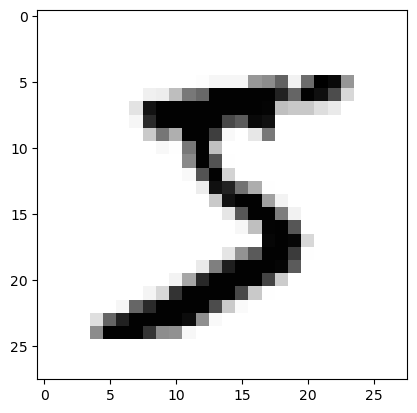

In [4]:
plt.imshow(train_X[0], cmap='Greys')
plt.show()

# Model 생성
- Sequential을 사용하여 모델 생성

In [5]:
def make_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation=tf.nn.relu, input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation=tf.nn.relu))
    model.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='same', strides=1))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(rate=0.2))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    return model

In [6]:
model = make_model()
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       501,770 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 520,586 (1.99 MB)

 Trainable params: 520,586 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model 학습

In [8]:
model.fit(train_X, train_y, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9330 - loss: 0.2232
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9868 - loss: 0.0416
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9919 - loss: 0.0251


### 예측

In [9]:
pred = model.predict(test_X)
pred_y = np.argmax(pred, axis=1) # 각 이미지에서 가장 큰 확률을 가지는 label 선택

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [10]:
# 정확도 체크
acc_score = accuracy_score(pred_y, test_y)
acc_score

0.9873

# 결과 확인

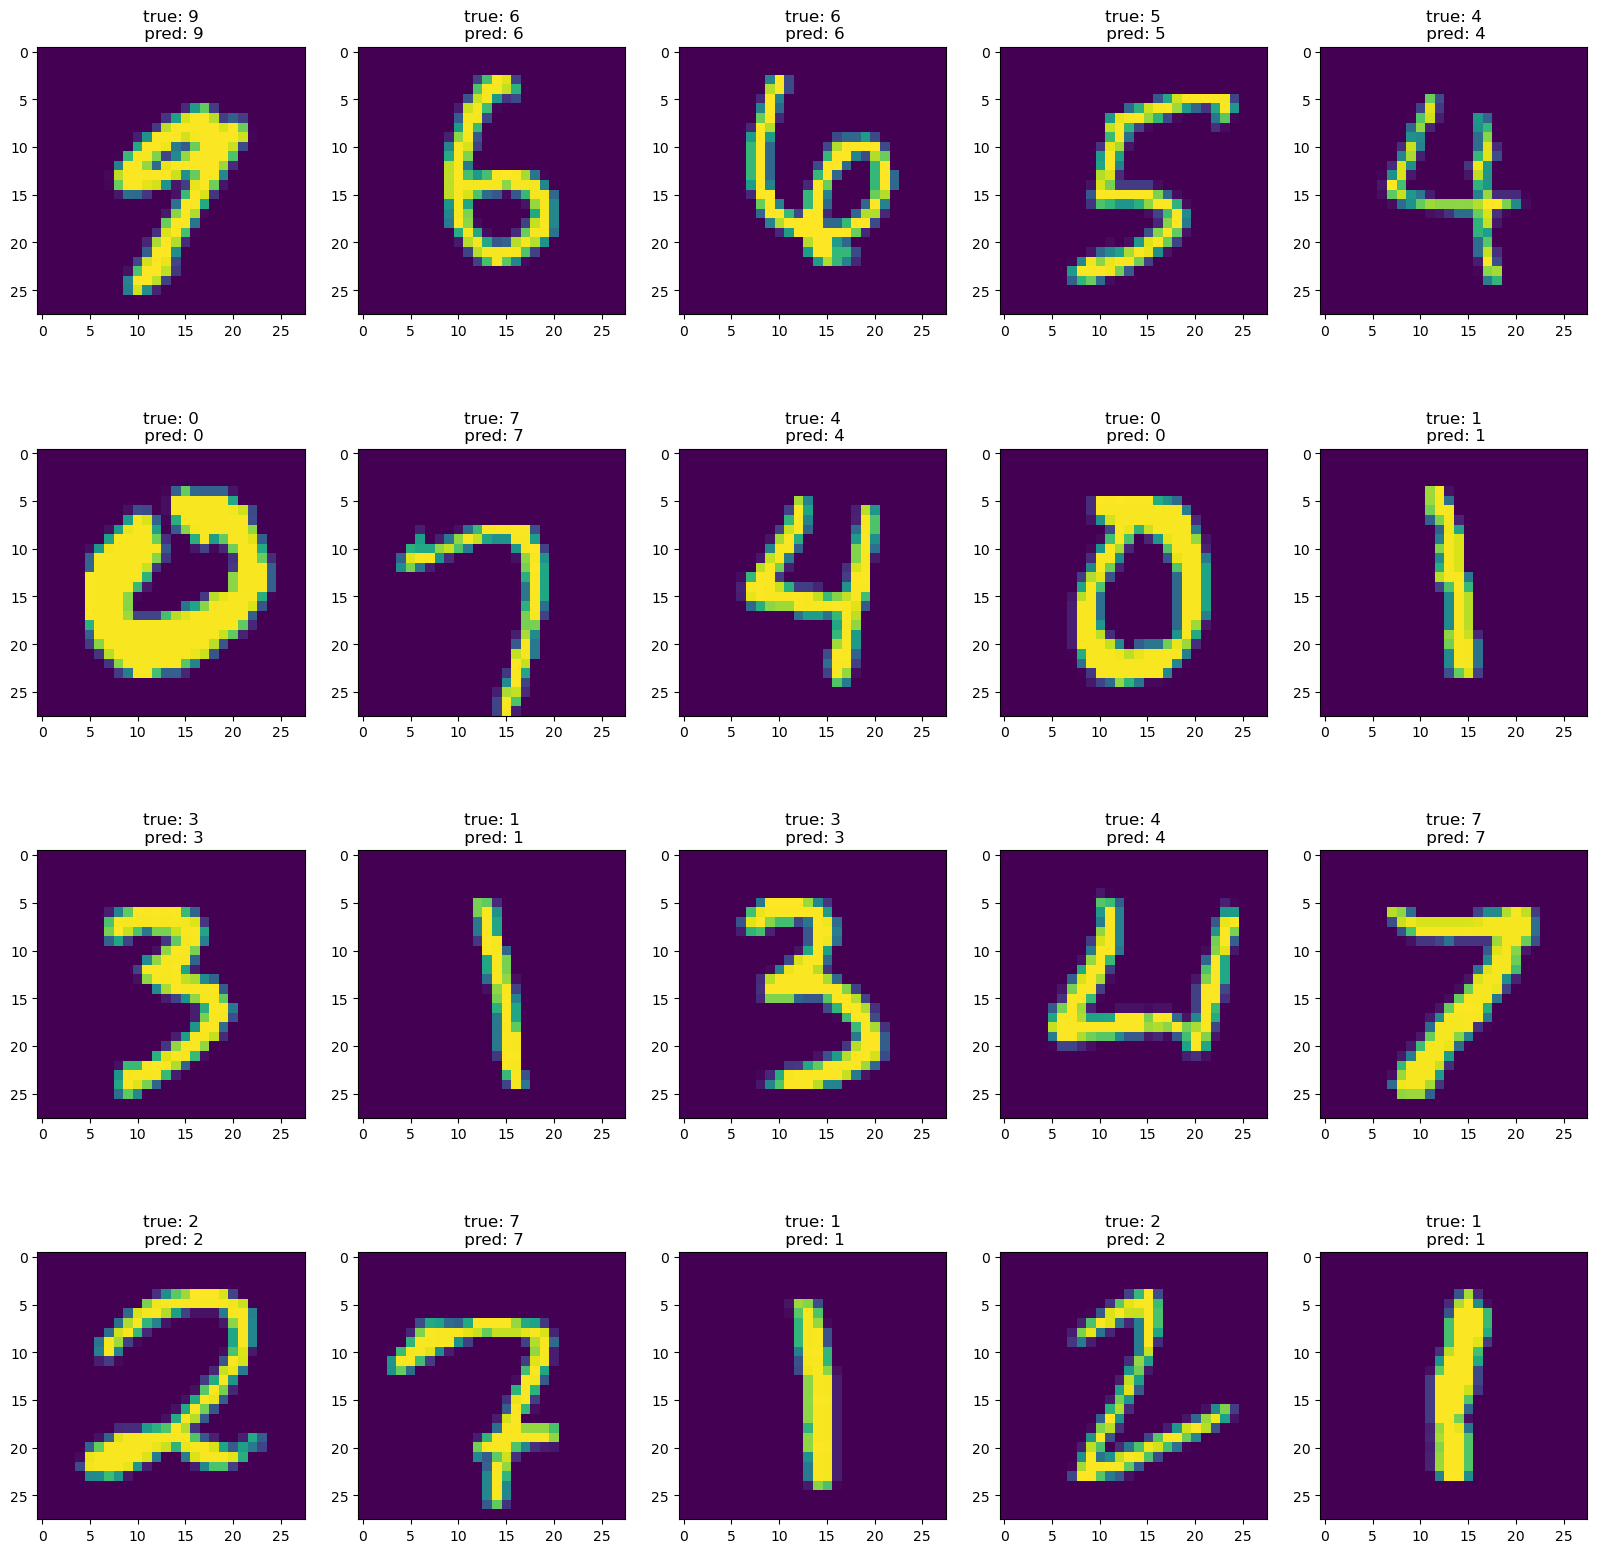

In [12]:
plt.figure(figsize=(20, 20))

for i in range(20, 40):
    image = test_X[i]
    label = test_y[i]
    pred = pred_y[i]

    ax = plt.subplot(4, 5, 1+(i%20))
    plt.imshow(image)
    plt.title(f'true: {label}\n pred: {pred}')

In [14]:
image.shape

(28, 28)